In [2]:
import os

In [3]:
_ = os.system("mkdir -p ~/aiffel/camera_sticker/models")
_ = os.system("mkdir -p ~/aiffel/camera_sticker/images")

In [4]:
_ = os.system("ln -s ~/data/* ~/aiffel/camera_sticker/images")

ln: failed to create symbolic link '/aiffel/aiffel/camera_sticker/images/hero.png': File exists
ln: failed to create symbolic link '/aiffel/aiffel/camera_sticker/images/image.png': File exists
ln: failed to create symbolic link '/aiffel/aiffel/camera_sticker/images/king.png': File exists


## 사진 준비하기

In [5]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

> `cv2.imread()`에 경로를 전달할 경우 상대경로 인식 불가

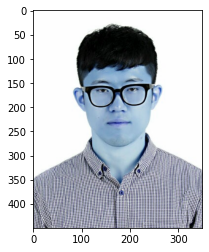

In [6]:
my_image_path = '/aiffel/aiffel/camera_sticker/images/profile.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path, 1)    # OpenCV로 이미지를 불러옵니다
# print(img_bgr)
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

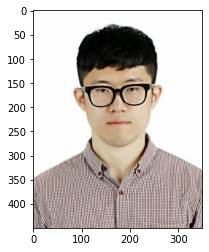

In [7]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

## 얼굴 검출 face detection

#### - Histogram of oriented Gradients 검출 함수 호출

In [8]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

#### - 얼굴 검출 영역 출력 [좌상단 좌표, 우하단 좌표]

rectangles[[(98, 133) (253, 288)]]


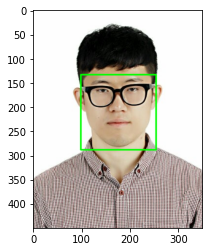

In [9]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 얼굴 랜드마크 face landmark

In [10]:
os.system("wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2")
os.system("mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/models")
os.system("cd ~/aiffel/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2")


--2024-11-18 04:25:06--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

     0K .......... .......... .......... .......... ..........  0%  748K 84s
    50K .......... .......... .......... .......... ..........  0% 1.44M 63s
   100K .......... .......... .......... .......... ..........  0% 30.5M 43s
   150K .......... .......... .......... .......... ..........  0% 1.52M 42s
   200K .......... .......... .......... .......... ..........  0%  148M 34s
   250K .......... .......... .......... .......... ..........  0% 66.4M 28s
   300K .......... .......... .......... .......... ..........  0% 1.53M 30s
   350K .......... .......... .......... .......... ..........  0%  131M 26s
   400K .......... .......... .......... .......... ....

 18700K .......... .......... .......... .......... .......... 29% 38.6M 1s
 18750K .......... .......... .......... .......... .......... 30%  119M 1s
 18800K .......... .......... .......... .......... .......... 30% 97.1M 1s
 18850K .......... .......... .......... .......... .......... 30%  147M 1s
 18900K .......... .......... .......... .......... .......... 30%  186M 1s
 18950K .......... .......... .......... .......... .......... 30%  156M 1s
 19000K .......... .......... .......... .......... .......... 30%  192M 1s
 19050K .......... .......... .......... .......... .......... 30%  156M 1s
 19100K .......... .......... .......... .......... .......... 30%  128M 1s
 19150K .......... .......... .......... .......... .......... 30%  152M 1s
 19200K .......... .......... .......... .......... .......... 30%  196M 1s
 19250K .......... .......... .......... .......... .......... 30% 95.6M 1s
 19300K .......... .......... .......... .......... .......... 30%  155M 1s
 19350K ....

 32550K .......... .......... .......... .......... .......... 52% 71.7M 1s
 32600K .......... .......... .......... .......... .......... 52%  186M 1s
 32650K .......... .......... .......... .......... .......... 52% 61.5M 1s
 32700K .......... .......... .......... .......... .......... 52% 9.74M 1s
 32750K .......... .......... .......... .......... .......... 52% 37.9M 1s
 32800K .......... .......... .......... .......... .......... 52% 53.4M 1s
 32850K .......... .......... .......... .......... .......... 52% 44.8M 1s
 32900K .......... .......... .......... .......... .......... 52% 46.0M 1s
 32950K .......... .......... .......... .......... .......... 52% 47.3M 1s
 33000K .......... .......... .......... .......... .......... 52% 58.8M 1s
 33050K .......... .......... .......... .......... .......... 52% 47.9M 1s
 33100K .......... .......... .......... .......... .......... 53% 44.3M 1s
 33150K .......... .......... .......... .......... .......... 53% 43.8M 1s
 33200K ....

 43700K .......... .......... .......... .......... .......... 69% 82.4M 0s
 43750K .......... .......... .......... .......... .......... 70%  195M 0s
 43800K .......... .......... .......... .......... .......... 70%  155M 0s
 43850K .......... .......... .......... .......... .......... 70% 27.6M 0s
 43900K .......... .......... .......... .......... .......... 70% 9.06M 0s
 43950K .......... .......... .......... .......... .......... 70% 67.6M 0s
 44000K .......... .......... .......... .......... .......... 70%  121M 0s
 44050K .......... .......... .......... .......... .......... 70%  102M 0s
 44100K .......... .......... .......... .......... .......... 70% 96.5M 0s
 44150K .......... .......... .......... .......... .......... 70%  123M 0s
 44200K .......... .......... .......... .......... .......... 70%  124M 0s
 44250K .......... .......... .......... .......... .......... 70%  123M 0s
 44300K .......... .......... .......... .......... .......... 70%  110M 0s
 44350K ....

 56100K .......... .......... .......... .......... .......... 89% 44.5M 0s
 56150K .......... .......... .......... .......... .......... 89% 12.1M 0s
 56200K .......... .......... .......... .......... .......... 89% 64.2M 0s
 56250K .......... .......... .......... .......... .......... 90% 63.9M 0s
 56300K .......... .......... .......... .......... .......... 90%  185M 0s
 56350K .......... .......... .......... .......... .......... 90%  172M 0s
 56400K .......... .......... .......... .......... .......... 90%  187M 0s
 56450K .......... .......... .......... .......... .......... 90%  165M 0s
 56500K .......... .......... .......... .......... .......... 90%  146M 0s
 56550K .......... .......... .......... .......... .......... 90% 45.4M 0s
 56600K .......... .......... .......... .......... .......... 90% 51.8M 0s
 56650K .......... .......... .......... .......... .......... 90% 38.3M 0s
 56700K .......... .......... .......... .......... .......... 90% 55.9M 0s
 56750K ....

bzip2: Output file ./models/shape_predictor_68_face_landmarks.dat already exists.


256

> `dlib.shape_predictor()`에 경로를 전달할 경우 상대경로 인식 불가

In [11]:
model_path = '/aiffel/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장

landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄


In [12]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


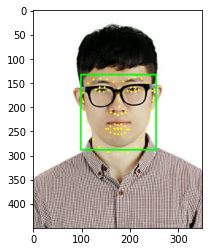

In [13]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

## 스티커 적용하기

In [14]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(177, 200)
(x,y) : (177,122)
(w,h) : (156,156)


In [62]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png' # 왕관 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(156, 156, 3)


In [16]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 437
# y는 이미지에서 코 부위의 y값 = 89
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
refined_x = x - w // 2 # 437 - (187//2) = 437-93 = 344
refined_y = y - h # 89-187 = -98
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남
# 우리는 현재 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

(x,y) : (99,-34)


In [17]:
# 왕관 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.

# 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (99,0)


In [18]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.
# 예제에서는 (344,0) 부터 (344+187, 0+89) 범위의 이미지를 의미합니다.
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[0:0+89, 344:344+187]
# img_show[0:89, 344:531]
# 즉, x좌표는 344~531 / y좌표는 0~89가 됨
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# 왕관 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용합니다.
# 왕관 이미지에서 0이 나오는 부분은 흰색이라는 뜻, 즉 이미지가 없다는 소리임.
# 현재 왕관 이미지에서는 왕관과 받침대 밑의 ------ 부분이 됨
# 그렇기 때문에 0인 부분(이미지가 없는 부분)은 제외하고 적용
# sticker_area는 원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지입니다.
# 즉, 왕관 이미지에서 왕관 이미지가 없는 부분(왕관과 받침대 밑의 ------ 부분)은 원본 이미지에서 미리 잘라놓은 sticker_area(스티커 적용할 부분 만큼 원본 이미지에서 자른 이미지)를 적용하고,
# 나머지 부분은 스티커로 채워주면 됨
# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.
# 아래 코드에서는 img_sticker가 0일 경우(왕관 이미지에서 왕관 부분 제외한 나머지 이미지)에는 sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# 나머지 부분은 img_sticker(왕관 이미지)를 적용한다.
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


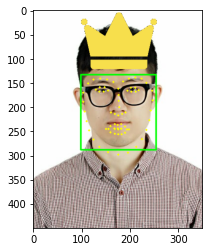

In [19]:
# 왕관 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 왕관 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

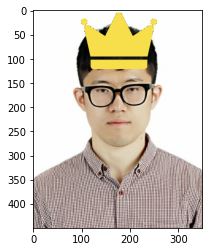

In [20]:
# 위에서 설명했으므로 생략
# 왕관 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

# 프로젝트: 고양이 수염 스티커 만들기

1. 고양이 수염 위치 랜드마크 지정
1.opencv 의 cv2.addWeighted() 적용
1.다양한 각도에서 촬영된 사진에 적용
1.사이즈, 방향일 다른 사진
1.실행속도
1.정확도

In [156]:
# 버전 확인
print(cv2.__version__)
print(dlib.__version__)

4.5.3
19.22.1


### 이미지 불러오기


In [157]:
my_image_path = '/aiffel/aiffel/camera_sticker/images/profile.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path, 1)
img_show = img_bgr.copy()

### 얼굴 검출 face detection

In [158]:
dlib_rects = detector_hog(img_rgb, 1)

#### - 얼굴 검출 영역 출력 [좌상단 좌표, 우하단 좌표]

rectangles[[(98, 133) (253, 288)]]


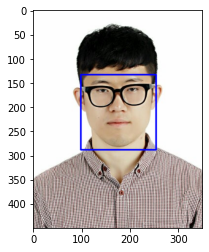

In [159]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b),
                  # 색, 두께, 타입
                  (255,0,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [160]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


In [161]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

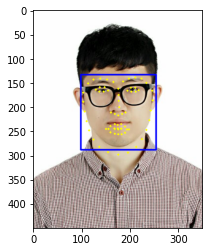

In [162]:
plt.imshow(img_show_rgb)
plt.show()

In [163]:
# 수염 위치에 어울리는 랜드마크
# ldmk_idx = 33 # 테스트 00 -- 코끝
# ldmk_idx = 51 # 테스트 01 -- 인중
ldmk_idx = 30 # 테스트 02 -- 콧망울

In [164]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[ldmk_idx])
    x = landmark[ldmk_idx][0]
    y = landmark[ldmk_idx][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    x_0 = landmark[0][0]
    y_0 = np.average([landmark[19], landmark[24]], axis=1)[1]
    x_1 =  landmark[16][0]
    y_1 =  landmark[8][1]
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')
    print (f'(x_0,y_0) : ({x_0},{y_0})')    
    print (f'(x_1,y_1) : ({x_1},{y_1})')    

(177, 200)
(x,y) : (177,122)
(w,h) : (156,156)
(x_0,y_0) : (103,174.5)
(x_1,y_1) : (245,298)


### 스티커 불러오기

In [165]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(156, 156, 3)


In [166]:
# img_sticker

In [167]:
refined_x = x - w // 2
refined_y = y
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남


(x,y) : (99,122)


In [168]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (99,122)


### 스티커 여백 마스킹

- 고양이 콧수염 스티커는 여백의 값이 255임. 255로 마스킹

In [169]:
sticker_area= img_show[refined_y:refined_y+img_sticker.shape[0],
                       refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0],
         refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,
             img_sticker).astype(np.uint8)

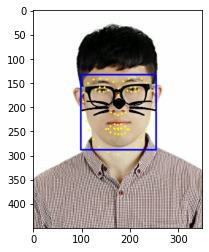

In [170]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### 오퍼시티 적용하기

In [171]:
sticker_area= img_bgr[refined_y:refined_y+img_sticker.shape[0],
                      refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y +img_sticker.shape[0],
        refined_x:refined_x+img_sticker.shape[1]] = \
  np.where(img_sticker==255, sticker_area,
    cv2.addWeighted(img_sticker,.5, sticker_area,.5, 0)
                                    ).astype(np.uint8)

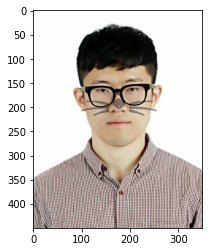

In [172]:
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 회전된 이미지

In [638]:
my_image_path = '/aiffel/aiffel/camera_sticker/images/profile_rot.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path, 1)
img_show = img_bgr.copy()

### 얼굴 검출 face detection

In [639]:
# img_bgr로 인자 바꿔 전달
dlib_rects = detector_hog(img_bgr, 1)

#### - 얼굴 검출 영역 출력 [좌상단 좌표, 우하단 좌표]

rectangles[[(64, 81) (218, 236)]]


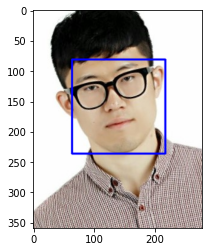

In [640]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b),
                  # 색, 두께, 타입
                  (255,0,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [641]:
list_landmarks = []
for dlib_rect in dlib_rects:
    # img_bgr로 인자 바꿔 전달
    points = landmark_predictor(img_bgr, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


In [642]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

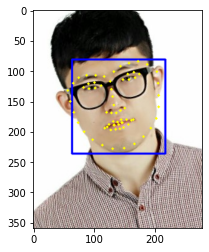

In [643]:
plt.imshow(img_show_rgb)
plt.show()

### 얼굴 각도 구하기

In [644]:
p1 = np.array(landmark[8])
p2 = np.array(landmark[27])
print(p1, p2)
# 이미지 좌표와 삼각함수 좌표는 y가 반대방향
face_angl = np.arctan(
                -(p1[1]-p2[1])/(p1[0]-p2[0])
                ) + np.deg2rad(90)

[150 227] [127 117]


In [645]:
height, width = img_show.shape[:2]
d_angl = np.arctan(height/width)
# 대각선 비
d = np.sin(d_angl+face_angl)/np.sin(d_angl)
rotated_size = int(width*d)+1, int(height*d)+1

np.rad2deg((d_angl, face_angl))
# np.cos(d_angl + face_angl), np.cos(d_angl)
print(rotation_center, face_angl, rotated_size)

(114.0, 146.5) 0.20612134187530695 (318, 409)


In [646]:
d

1.1378892186480454

### 원본 사진 수평맞추기

In [647]:
rotation_center = (width/2, height/2)

In [648]:
rotate_matrix = cv2.getRotationMatrix2D(
                center=rotation_center,
                angle=-np.rad2deg(face_angl), scale=1)

rotated_image = cv2.warpAffine(src=img_bgr,
           M=rotate_matrix, dsize=(width, height),
            borderMode=cv2.BORDER_TRANSPARENT)

In [649]:
img_show = rotated_image.copy()

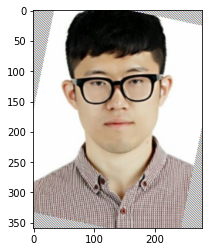

In [650]:
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.show()

### 수평 맞은 사진에 합성

In [651]:
dlib_rects = detector_hog(rotated_image, 1)

rectangles[[(64, 81) (218, 236)]]


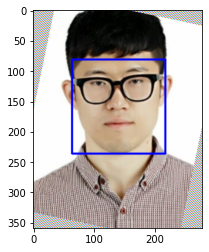

In [652]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b),
                  # 색, 두께, 타입
                  (255,0,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [653]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(rotated_image, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


In [654]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

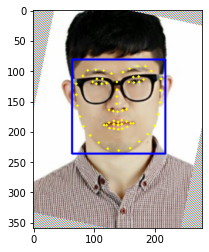

In [655]:
plt.imshow(img_show_rgb)
plt.show()

In [656]:
# 수염 위치에 어울리는 랜드마크
# ldmk_idx = 33 # 테스트 00 -- 코끝
# ldmk_idx = 51 # 테스트 01 -- 인중
ldmk_idx = 30 # 테스트 02 -- 콧망울

In [657]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[ldmk_idx])
    x = landmark[ldmk_idx][0]
    y = landmark[ldmk_idx][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    x_0 = landmark[0][0]
    y_0 = np.average([landmark[19], landmark[24]], axis=1)[1]
    x_1 =  landmark[16][0]
    y_1 =  landmark[8][1]
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')
    print (f'(x_0,y_0) : ({x_0},{y_0})')    
    print (f'(x_1,y_1) : ({x_1},{y_1})')    

(138, 154)
(x,y) : (138,76)
(w,h) : (155,155)
(x_0,y_0) : (71,132.0)
(x_1,y_1) : (211,231)


In [658]:
# img_sticker

In [659]:
refined_x = x - w // 2
refined_y = y
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남


(x,y) : (61,76)


In [660]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (61,76)


### 스티커 여백 마스킹

In [661]:
sticker_area= img_show[refined_y:refined_y+img_sticker.shape[0],
                       refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0],
         refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,
             img_sticker).astype(np.uint8)

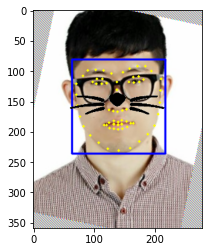

In [662]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### 오퍼시티 적용하기

In [663]:
sticker_area= rotated_image[refined_y:refined_y+img_sticker.shape[0],
                      refined_x:refined_x+img_sticker.shape[1]]

rotated_image[refined_y:refined_y +img_sticker.shape[0],
        refined_x:refined_x+img_sticker.shape[1]] = \
  np.where(img_sticker==255, sticker_area,
    cv2.addWeighted(img_sticker,.5, sticker_area,.5, 0)
                                    ).astype(np.uint8)

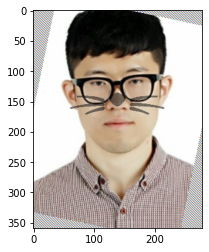

In [664]:
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.show()

### 합성된 사진 각도 복구

In [665]:
rotate_matrix = cv2.getRotationMatrix2D(
                center=rotation_center,
                angle=np.rad2deg(face_angl), scale=1)

rerotated_image = cv2.warpAffine(src=rotated_image,
           M=rotate_matrix, dsize=(width,height),)
#             borderMode=cv2.BORDER_TRANSPARENT)

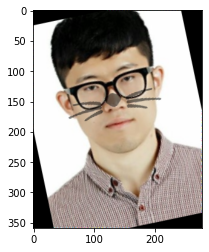

In [666]:
plt.clf()
plt.imshow(cv2.cvtColor(rerotated_image, cv2.COLOR_BGR2RGB))
plt.show()

> 아핀 변환을 사용하였을 때 border 밖으로 벗어난 픽셀들이 소실되는 문제가 생긴다!

> 크기 변환을 시도했으나 시간상 실패...